imports


In [ ]:

import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


warnings.filterwarnings('ignore')

Load the Dataset


In [ ]:

url = 'https://raw.githubusercontent.com/karrtik18/BTP_ASD-/main/autism_dataset.csv'
df = pd.read_csv(url)
print("Dataset loaded successfully.")

Dataset loaded successfully.


Data Cleaning


In [ ]:



df.replace('?', np.nan, inplace=True)


df['age'] = pd.to_numeric(df['age'], errors='coerce')


df['age'].fillna(df['age'].median(), inplace=True)


categorical_cols_to_impute = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'relation']
for col in categorical_cols_to_impute:

    df[col].fillna(df[col].mode()[0], inplace=True)

print("Data cleaning complete.")

Data cleaning complete.


encoding


In [ ]:

cols_to_drop = ['ethnicity', 'contry_of_res', 'age_desc', 'used_app_before', 'result']
df.drop(cols_to_drop, axis=1, inplace=True)


binary_map = {'yes': 1, 'no': 0, 'YES': 1, 'NO': 0}
df['jundice'] = df['jundice'].map(binary_map)
df['austim'] = df['austim'].map(binary_map)
df['Class/ASD'] = df['Class/ASD'].map(binary_map)
df = pd.get_dummies(df, columns=['gender', 'relation'], drop_first=True)

print("Feature engineering and encoding complete.")

Feature engineering and encoding complete.


verification

In [ ]:

print("\nDataFrame after all preprocessing and encoding:")
print(df.head())
print("\nColumns in the final preprocessed DataFrame:")
print(df.columns)
print(f"\nShape of the final preprocessed DataFrame: {df.shape}")
print("\nChecking for any remaining missing values (all should be 0):")
print(df.isnull().sum())


DataFrame after all preprocessing and encoding:
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score   age  jundice  austim  Class/ASD  gender_m  \
0         1         0          0  26.0        0       0          0     False   
1         1         0          1  24.0        0       1          0      True   
2         1         1          1  27.0        1       1          1      True   
3         1         0          1  35.0        0       1          0     False   
4         1         0          0  40.0        0       0          0     False   

   relation_Others 

preparing data for modelling

In [ ]:

X = df.drop(['Class/ASD'], axis=1)
y = df['Class/ASD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Data split into training and testing sets.
X_train shape: (563, 18)
X_test shape: (141, 18)


train the model

In [ ]:

model = XGBClassifier(random_state=42)
model.fit(X_train.values, y_train.values)

print("\nXGBoost model trained successfully.")


XGBoost model trained successfully.


evaluate the model


Model Accuracy: 97.87%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.92      1.00      0.96        36

    accuracy                           0.98       141
   macro avg       0.96      0.99      0.97       141
weighted avg       0.98      0.98      0.98       141


Confusion Matrix:


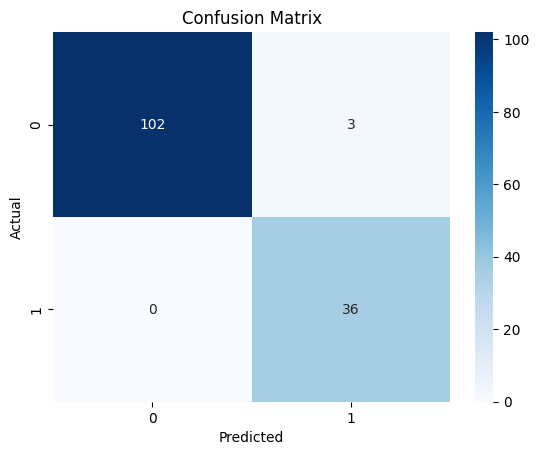

In [ ]:
 
y_pred = model.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

 
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()